# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


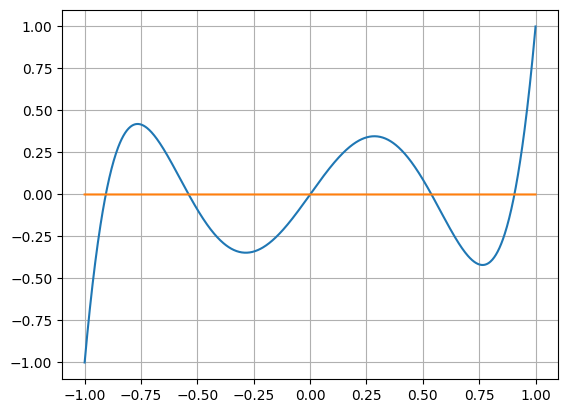

In [2]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

#phi = lambda x : 63./70.*x**3 + 15./(70.*x)
phi = lambda x : 70.0/(63.*x) - 15/(63*x**3)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

#phi_prime = lambda x : 63./70.*3*x**2 - 15./(70.*x**2)
phi_prime = lambda x : -70./(63*x**2) + 15.*3./(63.*x**4)
#phi_prime = lambda x : 70./15.0*3*x**2 - 63.0/15.0*5*x**4
#phi_prime = lambda x : 1.0/(2.0*sqrt((63.*x**4 + 15.0)/70.))*(63.*4*x**3/70.)

#print(abs(phi_prime(0.95)))
#phi_prime =

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [3]:
# Initial data for the variuos algorithms

# interval in which we seek the solution
a = 0.75
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [4]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

31
0.9061798459733836
5.820766091346741e-11
31.219280948873624


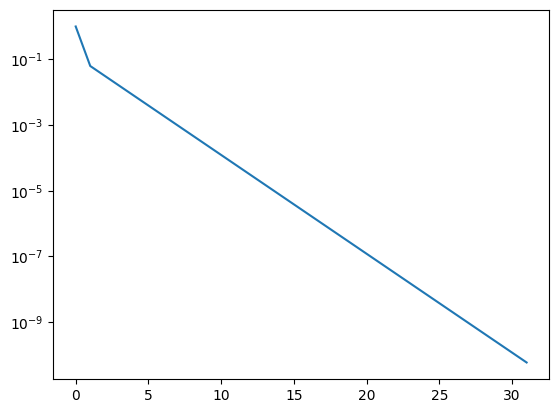

In [5]:
def bisect(f,a,b,eps,n_max):
    assert f(a)*f(b)<0
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x

        x_new = mean([a_new,b_new])

        #err = 0.5 *(b_new -a_new)
        #err = abs(f(x_new))
        err = abs(x-x_new)

        errors.append(err)
        x = x_new
        it += 1

    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors

#errors_bisect = bisect(f,a,b,eps,n_max)
errors_bisect = bisect(f,a,b,eps,n_max)

it_theor = (log(abs(b-a)) - log(eps))/log(2)
print(it_theor)



In [6]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
5
0.9061798459386647
5.633945684709343e-15


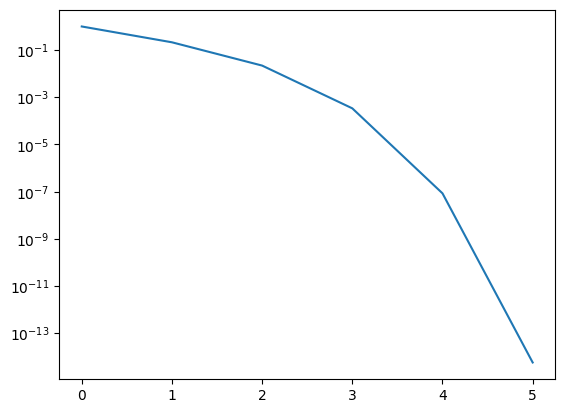

In [7]:
def newton(f,f_prime,x0,eps,n_max):
    # assert abs(f_prime(x0))>1e-16
    err = abs(f(x0))
    errors = [err]
    it = 0
    x = x0
    while (err > eps and it < n_max):
        qk = f_prime(x)
        if abs(qk) < 1e-12:
          raise RuntimeError("f_prime(x) is close to zero")
        x_new = x - f(x)/qk
        err = abs(f(x_new))
        x = x_new
        errors.append(err)
        it +=1
    print(it)
    print(x)
    print(err)
    semilogy(errors)
    return errors


%time
errors_newton = newton(f,f_prime,1.0,eps,n_max)


## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

0.9061798459469729
4.738154313344012e-11
13


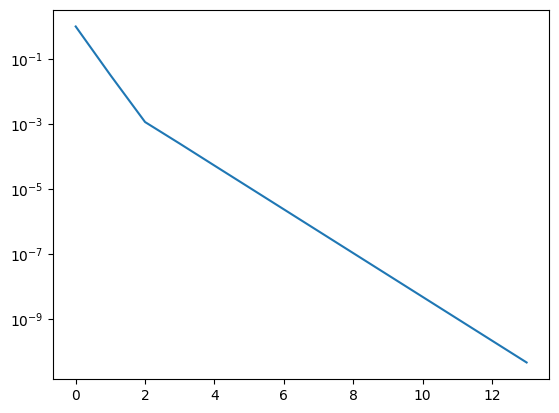

In [8]:
def chord(f,a,b,x0,eps,n_max):
    #assert
    q = (f(b) - f(a))/(b-a)
    err = eps +1.
    errors = [err]
    it = 0
    x = x0
    while (err > eps and it < n_max):
          x_new = x - f(x)/q
          err = abs(x_new - x)
          errors.append(err)
          x = x_new
          #print(x)
          it += 1
    print(x)
    print(err)
    print(it)
    semilogy(errors)
    return errors

#%time
errors_chord = chord (f,a,b,x0,eps,n_max)

#print(x0)

#semilogy(errors_chord)

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

0.906179845938664
8.43769498715119e-15
7


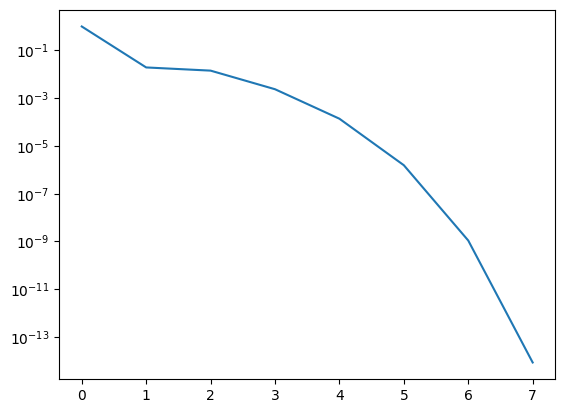

In [9]:
def secant(f,x0,x00,eps,n_max):
    err = eps +1.
    errors = [err]
    it = 0
    xk = x0
    xkk = x00

    while (err > eps and it < n_max):
          qk = (f(xk) - f(xkk))/(xk - xkk)
          x_new = xk - f(xk)/qk
          err = abs(x_new - xk)
          xkk = xk
          xk = x_new
          errors.append(err)
          it += 1

    print(xk)
    print(err)
    print(it)
    semilogy(errors)
    return errors

#%time
errors_secant = secant(f,x0,x00,eps,n_max)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$


We want to solve $f = \dfrac{t}{8}\left(63 t^4 - 70 t^2 + 15\right) = 0$. Then we can focus our attention on the roots finding of $f_1 = 63 t^4 - 70 t^2 + 15$.

We recast $f_1(t)$ in terms of $t - \phi(t)$. We consider different ways to go:

Dividing by $70t$:

$\dfrac{63}{70}t^3 - t + \dfrac{15}{70t} = 0$ $\implies$ $\phi_1 = \dfrac{63}{70}t^3 + \dfrac{15}{70t}$

Dividing by $63t^3$:

$t - \dfrac{70}{63t} + \dfrac{15}{63t^3} = 0$ $\implies$ $\phi_2 = \dfrac{70}{63t} - \dfrac{15}{63t^3}$


Multiplying by $\dfrac{t}{15}$:

$\dfrac{63}{15}t^5 - \dfrac{70}{15}t^3 + t  = 0$ $\implies$ $\phi_3 = -\dfrac{63}{15}t^5 + \dfrac{70}{15}t^3$

Finally:

$70t^2 = 63t^4 + 15$ $\implies$ $t = \sqrt{\dfrac{63t^4 + 15}{70}}$ $\implies$ $\phi_4 = \sqrt{\dfrac{63t^4 + 15}{70}}$

0.007750496031746268
0.9061798459220886
7.29919458208883e-11
18


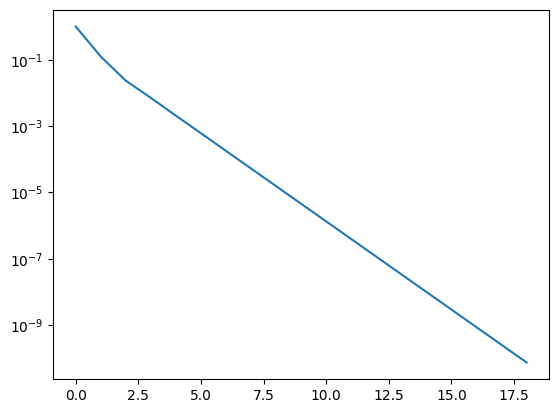

In [10]:
def fixed_point(phi,x0,eps,n_max):
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
      x_new = phi(x)
      err = abs (x_new - x)
      x = x_new
      it +=1
      errors.append(err)

    print(x)
    print(err)
    print(it)
    semilogy(errors)
    return(errors)

print(abs(phi_prime(0.8)))
#%time
errors_fixed = fixed_point(phi,0.8,eps,n_max)


## Comparison

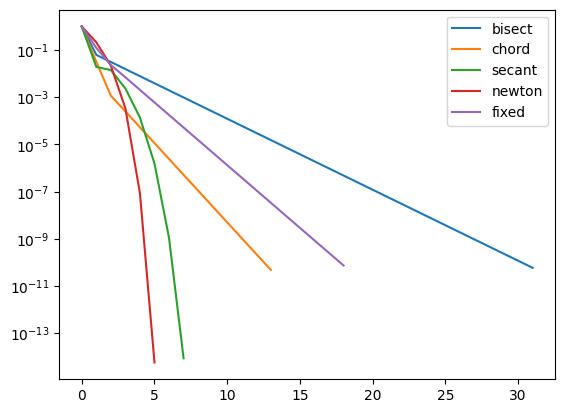

In [11]:
# plot the error convergence for the methods
semilogy(errors_bisect, label='bisect')
semilogy(errors_chord, label='chord')
semilogy(errors_secant, label='secant')
semilogy(errors_newton, label ='newton')
semilogy(errors_fixed, label ='fixed')
_ = legend()

In [12]:
# Let's compare the scipy implmentation of Newton's method with our..

In [13]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 639 µs, sys: 0 ns, total: 639 µs
Wall time: 650 µs


0.906179845938664